In [23]:
#imports
import pickle
import pandas as pd
import numpy as np


In [24]:
#load apple_df_ML.pkl
apple_df_ML = pickle.load(open('apple_df_ML.pkl', 'rb'))


In [25]:
X = apple_df_ML.drop('gain', axis=1).values
y = apple_df_ML['gain'].values
X

array([[116.759684, 116.865102, 116.747758, ..., 116.736085, 116.768768,
        116.790573],
       [114.420705, 114.002524, 113.957528, ..., 114.433863, 114.488096,
        114.661564],
       [113.606819, 113.845019, 113.947424, ..., 115.136823, 115.125646,
        115.174199],
       ...,
       [141.985858, 142.114042, 142.227377, ..., 138.915147, 138.994524,
        138.938381],
       [137.599456, 137.384981, 137.338305, ..., 139.948746, 139.987529,
        139.921587],
       [137.627544, 137.508483, 137.48028 , ..., 136.956956, 136.90308 ,
        136.792118]])

In [26]:
# import the necessary modules
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1204)

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()

In [30]:
scaler.fit(X_train)

MinMaxScaler()

In [31]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
!TF_ENABLE_ONEDNN_OPTS=0
!CUDA_VISIBLE_DEVICES=0
!TF_ENABLE_ONEDNN_OPTS=0

In [77]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras import layers
from tensorflow.keras import activations

In [78]:
model = Sequential()

#model.add(Dense(units=1000, activation=activations.softplus , input_shape=(X_train.shape[1],)))
#model.add(Dropout(0.1))

#model.add(Dense(units=500, activation=activations.softplus))
#model.add(Dropout(0.1))

#model.add(Dense(units=250, activation=activations.softplus))
#model.add(Dropout(0.1))

model.add(Dense(units=1000, activation=activations.softmax))
model.add(Dropout(0.01))

#model.add(Dense(units=50, activation='relu'))

model.add(Dense(units=750, activation=activations.gelu))
model.add(Dropout(0.02))

#model.add(Dense(units=10, activation='relu'))
#model.add(Dropout(0.1))

#model.add(Dense(units=4, activation='relu'))
#model.add(Dropout(0.1))

model.add(Dense(units=1, activation=activations.sigmoid))
#model.add(Dropout(0.1))

#binary_crossentropy
model.compile(loss='binary_crossentropy', optimizer='adam')


In [79]:
#train the model
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
model.fit(x=X_train, y=y_train, epochs=350, batch_size=256, validation_data=(X_test, y_test), verbose=1, callbacks=[callback])

Epoch 1/350
2/2 [==============================] - 1s 116ms/step - loss: 0.6934 - val_loss: 0.6933
Epoch 2/350
2/2 [==============================] - 0s 29ms/step - loss: 0.6932 - val_loss: 0.6916
Epoch 3/350
2/2 [==============================] - 0s 27ms/step - loss: 0.6929 - val_loss: 0.6906
Epoch 4/350
2/2 [==============================] - 0s 29ms/step - loss: 0.6929 - val_loss: 0.6897
Epoch 5/350
2/2 [==============================] - 0s 27ms/step - loss: 0.6929 - val_loss: 0.6891
Epoch 6/350
2/2 [==============================] - 0s 27ms/step - loss: 0.6931 - val_loss: 0.6887
Epoch 7/350
2/2 [==============================] - 0s 26ms/step - loss: 0.6933 - val_loss: 0.6887
Epoch 8/350
2/2 [==============================] - 0s 28ms/step - loss: 0.6931 - val_loss: 0.6892
Epoch 9/350
2/2 [==============================] - 0s 28ms/step - loss: 0.6930 - val_loss: 0.6899
Epoch 10/350
2/2 [==============================] - 0s 27ms/step - loss: 0.6930 - val_loss: 0.6907
Epoch 11/350
2/2 [

<AxesSubplot:>

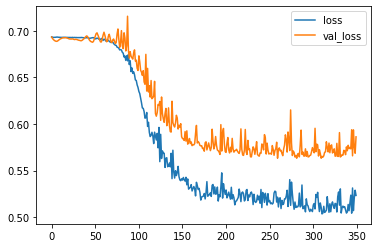

In [80]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [81]:
from sklearn.metrics import confusion_matrix, classification_report

In [83]:
# if model.predict(X_test) > 0.44 then 1 else 0:
predictions = model.predict(X_test)
offset = .00
predictions[predictions > (predictions.mean() + offset)] = 1
predictions[predictions <= (predictions.mean() + offset)] = 0
predictions

3/3 [==============================] - 0s 2ms/step


array([[1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],

In [84]:
print(classification_report(y_test, predictions,zero_division=0))

              precision    recall  f1-score   support

           0       0.65      0.62      0.63        42
           1       0.71      0.74      0.73        54

    accuracy                           0.69        96
   macro avg       0.68      0.68      0.68        96
weighted avg       0.69      0.69      0.69        96



In [85]:
confusion_matrix(y_test, predictions)

array([[26, 16],
       [14, 40]])